In [43]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df_stats = pd.read_csv('./scan_stats.csv')

In [45]:
df_stats

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime
0,False,baseline,umap_fuzzy_simplicial_set,25,leiden_cpm,0.0010,manhattan,22,0.045161,0.657253,19,19933,NaN
1,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0005,manhattan,107,-0.010534,0.842630,65,14256,NaN
2,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0015,manhattan,253,-0.016311,0.816387,112,9875,NaN
3,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0025,manhattan,361,-0.016936,0.803483,130,8043,NaN
4,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0035,manhattan,457,-0.018660,0.792606,148,7075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.6000000000000001,1948,0.033720,0.277613,315,3859,2024-01-29 15:53:30.508623
662,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.7000000000000001,1941,0.034737,0.282455,319,4029,2024-01-29 15:53:30.508623
663,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.8,1917,0.034019,0.288294,316,3935,2024-01-29 15:53:30.508623
664,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.9,1926,0.036315,0.289828,317,3954,2024-01-29 15:53:30.508623


In [46]:
df_stats.drop_duplicates(subset=df_stats.columns.difference(['datetime']), inplace=True)

In [47]:
df_stats

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime
0,False,baseline,umap_fuzzy_simplicial_set,25,leiden_cpm,0.0010,manhattan,22,0.045161,0.657253,19,19933,NaN
1,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0005,manhattan,107,-0.010534,0.842630,65,14256,NaN
2,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0015,manhattan,253,-0.016311,0.816387,112,9875,NaN
3,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0025,manhattan,361,-0.016936,0.803483,130,8043,NaN
4,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0035,manhattan,457,-0.018660,0.792606,148,7075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.6000000000000001,1948,0.033720,0.277613,315,3859,2024-01-29 15:53:30.508623
662,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.7000000000000001,1941,0.034737,0.282455,319,4029,2024-01-29 15:53:30.508623
663,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.8,1917,0.034019,0.288294,316,3935,2024-01-29 15:53:30.508623
664,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.9,1926,0.036315,0.289828,317,3954,2024-01-29 15:53:30.508623


In [48]:
def compute_num_clusters_fraction_of_genes_enriched(row):
    return row['nenriched_clusters'] * (row['nenriched_cluster_genes'] / 20326)

In [49]:
df_stats['num_clusters_fraction_of_genes_enriched'] = df_stats.apply(compute_num_clusters_fraction_of_genes_enriched, axis=1)

In [50]:
df_stats

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
0,False,baseline,umap_fuzzy_simplicial_set,25,leiden_cpm,0.0010,manhattan,22,0.045161,0.657253,19,19933,NaN,18.632638
1,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0005,manhattan,107,-0.010534,0.842630,65,14256,NaN,45.588901
2,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0015,manhattan,253,-0.016311,0.816387,112,9875,NaN,54.413067
3,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0025,manhattan,361,-0.016936,0.803483,130,8043,NaN,51.441012
4,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0035,manhattan,457,-0.018660,0.792606,148,7075,NaN,51.515301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.6000000000000001,1948,0.033720,0.277613,315,3859,2024-01-29 15:53:30.508623,59.804438
662,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.7000000000000001,1941,0.034737,0.282455,319,4029,2024-01-29 15:53:30.508623,63.231871
663,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.8,1917,0.034019,0.288294,316,3935,2024-01-29 15:53:30.508623,61.175834
664,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.9,1926,0.036315,0.289828,317,3954,2024-01-29 15:53:30.508623,61.665748


In [51]:
19 * (19933/20326)

18.632638000590376

In [52]:
df_stats_true = df_stats.loc[df_stats['shuffled'] == False]
df_stats_neg_ctrl = df_stats.loc[~df_stats['shuffled'] == False]

In [53]:
df_stats_true

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
0,False,baseline,umap_fuzzy_simplicial_set,25,leiden_cpm,0.0010,manhattan,22,0.045161,0.657253,19,19933,NaN,18.632638
1,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0005,manhattan,107,-0.010534,0.842630,65,14256,NaN,45.588901
2,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0015,manhattan,253,-0.016311,0.816387,112,9875,NaN,54.413067
3,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0025,manhattan,361,-0.016936,0.803483,130,8043,NaN,51.441012
4,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0035,manhattan,457,-0.018660,0.792606,148,7075,NaN,51.515301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.6000000000000001,1948,0.033720,0.277613,315,3859,2024-01-29 15:53:30.508623,59.804438
662,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.7000000000000001,1941,0.034737,0.282455,319,4029,2024-01-29 15:53:30.508623,63.231871
663,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.8,1917,0.034019,0.288294,316,3935,2024-01-29 15:53:30.508623,61.175834
664,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0950,minkowski_0.9,1926,0.036315,0.289828,317,3954,2024-01-29 15:53:30.508623,61.665748


In [54]:
df_stats_neg_ctrl

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
91,True,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0005,manhattan,130,-0.038318,0.690289,11,2583,NaN,1.397865
92,True,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0015,manhattan,312,-0.044142,0.672866,20,1386,NaN,1.363771
93,True,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0025,manhattan,436,-0.045779,0.665135,19,932,NaN,0.871199
94,True,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0035,manhattan,534,-0.048054,0.658994,30,1194,NaN,1.762275
95,True,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0045,manhattan,609,-0.048997,0.653910,27,891,NaN,1.183558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,675,-0.026648,0.195054,30,1090,2024-01-24 18:04:48.235283,1.608777
643,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,674,-0.025845,0.195221,32,1269,2024-01-24 18:04:48.235283,1.997835
644,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,676,-0.027873,0.193478,26,969,2024-01-24 18:04:48.235283,1.239496
645,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,682,-0.025543,0.195814,26,884,2024-01-24 18:04:48.235283,1.130768


In [55]:
df_true_cluster = df_stats_true.loc[
    (df_stats_true['nns'] == 10) & 
    (df_stats_true['parameter'] == 0.0105) & 

    (df_stats_true['dimensionality'] == 'baseline') &
    (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
    (df_stats_true['clustering'] == 'leiden_cpm') &
    (df_stats_true['metric'] == 'manhattan') 
]

In [56]:
df_neg_ctrls = df_stats_neg_ctrl.loc[
    (df_stats_neg_ctrl['nns'] == 10) & 
    (df_stats_neg_ctrl['parameter'] == 0.0105) & 

    (df_stats_neg_ctrl['dimensionality'] == 'baseline') &
    (df_stats_neg_ctrl['graph'] == 'umap_fuzzy_simplicial_set') &
    (df_stats_neg_ctrl['clustering'] == 'leiden_cpm') &
    (df_stats_neg_ctrl['metric'] == 'manhattan') 
]

In [57]:
df_true_cluster

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
211,False,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,330,0.026335,0.511688,150,9987,NaN,73.701171


In [58]:
df_neg_ctrls

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
547,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,680,-0.026797,0.194904,37,1205,2024-01-24 18:04:48.235283,2.193496
548,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,683,-0.027710,0.193193,31,1074,2024-01-24 18:04:48.235283,1.638001
549,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,672,-0.028216,0.193733,40,1163,2024-01-24 18:04:48.235283,2.288694
550,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,677,-0.025221,0.195045,40,1425,2024-01-24 18:04:48.235283,2.804290
551,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,677,-0.026977,0.195180,37,1203,2024-01-24 18:04:48.235283,2.189855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,675,-0.026648,0.195054,30,1090,2024-01-24 18:04:48.235283,1.608777
643,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,674,-0.025845,0.195221,32,1269,2024-01-24 18:04:48.235283,1.997835
644,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,676,-0.027873,0.193478,26,969,2024-01-24 18:04:48.235283,1.239496
645,True,baseline,umap_fuzzy_simplicial_set,10,leiden_cpm,0.0105,manhattan,682,-0.025543,0.195814,26,884,2024-01-24 18:04:48.235283,1.130768


In [59]:
# hist_clustering_metric = 'silhouette_score'
hist_clustering_metric = 'modularity'

hist_data = df_neg_ctrls[hist_clustering_metric].values
hist_data

array([0.19490362, 0.19319277, 0.19373343, 0.19504473, 0.19518046,
       0.19686834, 0.19341294, 0.19725298, 0.19626031, 0.19405591,
       0.19456199, 0.19509314, 0.19441672, 0.19625003, 0.19524079,
       0.19369672, 0.19380271, 0.19595887, 0.19589131, 0.19478897,
       0.19353239, 0.19371704, 0.19508176, 0.19531377, 0.19494141,
       0.19587278, 0.19497018, 0.19385561, 0.19497944, 0.19608891,
       0.19440857, 0.19441266, 0.19502018, 0.19470928, 0.19414415,
       0.19495602, 0.19653196, 0.19586038, 0.19497283, 0.19412333,
       0.19391175, 0.19466985, 0.19308714, 0.19408784, 0.19550381,
       0.19630879, 0.19477396, 0.19508985, 0.19402864, 0.19470887,
       0.19428192, 0.19364988, 0.19410053, 0.1935498 , 0.19431894,
       0.19603325, 0.19511662, 0.193504  , 0.19463018, 0.19352778,
       0.19553349, 0.19654768, 0.19402822, 0.19469881, 0.19548416,
       0.19479582, 0.19327622, 0.19535206, 0.19430645, 0.19547172,
       0.19590022, 0.19383623, 0.19637653, 0.19482244, 0.19444

In [60]:
hist_line_at_x = df_true_cluster[hist_clustering_metric].values[0]
hist_line_at_x

0.5116882536820375

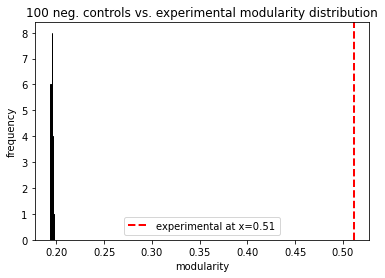

In [61]:
# Create the histogram
plt.hist(hist_data, bins=30, edgecolor='black')

# Add a vertical line at the specified x value
plt.axvline(x=hist_line_at_x, color='red', linestyle='dashed', linewidth=2, label='experimental at x={}'.format(round(hist_line_at_x, 2)))

# Add labels and title
plt.xlabel(hist_clustering_metric)
plt.ylabel('frequency')
plt.title(f'{len(hist_data)} neg. controls vs. experimental {hist_clustering_metric} distribution')

plt.legend()

# Show the plot
plt.show()

In [62]:
df_stats_true['silhouette_score'].mean()

0.03497542790236354

In [63]:
df_stats_true['silhouette_score'].median()

0.0349179005

In [64]:
df_stats_true['silhouette_score'].max()

0.1090618860024298

In [65]:
df_stats_true['modularity'].mean()

0.40019024971181794

In [66]:
df_stats_neg_ctrl['silhouette_score'].mean()

-0.02511319001313437

In [67]:
df_stats_neg_ctrl['silhouette_score'].median()

-0.0261023913542975

In [68]:
df_stats_neg_ctrl['silhouette_score'].max()

0.062478323

In [69]:
df_stats_neg_ctrl['modularity'].mean()

0.2325204734328096

In [70]:
df_stats_neg_ctrl['modularity'].median()

0.19489849222439104

In [71]:
df_stats_true['nns'].unique()

array([ 25,   3,   6,   9,  12,  15,  18,  21,  24,  27,   5,  10,  20,
        30,  35,  40,  45,   8,  11,  14,  55,  80, 105,  13,  16,  17])

In [72]:
df_stats_true['parameter'].unique()

array([1.00e-03, 5.00e-04, 1.50e-03, 2.50e-03, 3.50e-03, 4.50e-03,
       5.50e-03, 6.50e-03, 7.50e-03, 8.50e-03, 9.50e-03, 7.00e-03,
       1.05e-02, 1.40e-02, 1.75e-02, 2.10e-02, 2.45e-02, 2.80e-02,
       3.15e-02, 3.50e-02, 3.85e-02, 4.20e-02, 4.55e-02, 4.90e-02,
       5.25e-02, 5.60e-02, 5.95e-02, 6.30e-02, 6.65e-02, 7.00e-02,
       7.35e-02, 7.70e-02, 8.05e-02, 8.40e-02, 8.75e-02, 9.10e-02,
       9.45e-02, 9.80e-02, 4.00e-01, 6.00e-01, 8.00e-01, 2.00e-04,
       4.00e-04, 6.00e-04, 8.00e-04, 1.20e-03, 5.00e-03, 1.50e-02,
       2.50e-02, 3.50e-02, 4.50e-02, 5.50e-02, 6.50e-02, 7.50e-02,
       8.50e-02, 9.50e-02])

In [73]:
df_stats_true['parameter'].min()

0.0002

In [74]:
df_stats_true.loc[df_stats_true['modularity'] > 0.8]

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
1,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0005,manhattan,107,-0.010534,0.842630,65,14256,NaN,45.588901
2,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0015,manhattan,253,-0.016311,0.816387,112,9875,NaN,54.413067
3,False,baseline,umap_fuzzy_simplicial_set,3,leiden_cpm,0.0025,manhattan,361,-0.016936,0.803483,130,8043,NaN,51.441012


In [75]:
df_stats_true.loc[(df_stats_true['silhouette_score'] > 0.04) & (df_stats_true['nclusters'] > 100)]

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
76,False,baseline,umap_fuzzy_simplicial_set,24,leiden_cpm,0.0055,manhattan,107,0.042697,0.519864,75,15497,NaN,57.181688
86,False,baseline,umap_fuzzy_simplicial_set,27,leiden_cpm,0.0055,manhattan,103,0.041819,0.513228,71,15816,NaN,55.246286
87,False,baseline,umap_fuzzy_simplicial_set,27,leiden_cpm,0.0065,manhattan,120,0.040900,0.497742,79,14343,NaN,55.746187
89,False,baseline,umap_fuzzy_simplicial_set,27,leiden_cpm,0.0085,manhattan,155,0.040221,0.465540,96,13750,NaN,64.941454
345,False,baseline,umap_fuzzy_simplicial_set,30,leiden_cpm,0.0875,manhattan,1436,0.040506,0.207583,265,4844,NaN,63.153596
347,False,baseline,umap_fuzzy_simplicial_set,30,leiden_cpm,0.0945,manhattan,1541,0.040457,0.200081,284,4686,NaN,65.473974
348,False,baseline,umap_fuzzy_simplicial_set,30,leiden_cpm,0.0980,manhattan,1589,0.040833,0.196513,288,4607,NaN,65.276788
371,False,baseline,umap_fuzzy_simplicial_set,35,leiden_cpm,0.0805,manhattan,1283,0.040127,0.204750,257,5357,NaN,67.733396
373,False,baseline,umap_fuzzy_simplicial_set,35,leiden_cpm,0.0875,manhattan,1405,0.041189,0.195919,272,4997,NaN,66.869232
374,False,baseline,umap_fuzzy_simplicial_set,35,leiden_cpm,0.0910,manhattan,1445,0.041053,0.190487,267,4855,NaN,63.774722


In [76]:
df_stats_true.loc[df_stats_true['nclusters'] < 10]

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
71,False,baseline,umap_fuzzy_simplicial_set,24,leiden_cpm,0.0005,manhattan,9,0.079307,0.663075,9,20326,NaN,9.0
81,False,baseline,umap_fuzzy_simplicial_set,27,leiden_cpm,0.0005,manhattan,9,0.086541,0.659088,9,20326,NaN,9.0
451,False,baseline,umap_fuzzy_simplicial_set,30,leiden_cpm,0.0002,manhattan,3,0.075259,0.432712,3,20326,NaN,3.0
452,False,baseline,umap_fuzzy_simplicial_set,30,leiden_cpm,0.0004,manhattan,8,0.063060,0.639491,8,20326,NaN,8.0
457,False,baseline,umap_fuzzy_simplicial_set,55,leiden_cpm,0.0002,manhattan,3,0.040833,0.354603,3,20326,NaN,3.0
458,False,baseline,umap_fuzzy_simplicial_set,55,leiden_cpm,0.0004,manhattan,5,0.109062,0.589821,5,20326,NaN,5.0
459,False,baseline,umap_fuzzy_simplicial_set,55,leiden_cpm,0.0006,manhattan,7,0.101691,0.633670,7,20326,NaN,7.0
463,False,baseline,umap_fuzzy_simplicial_set,80,leiden_cpm,0.0002,manhattan,3,0.060587,0.427085,3,20326,NaN,3.0
464,False,baseline,umap_fuzzy_simplicial_set,80,leiden_cpm,0.0004,manhattan,4,0.093761,0.542299,4,20326,NaN,4.0
465,False,baseline,umap_fuzzy_simplicial_set,80,leiden_cpm,0.0006,manhattan,7,0.096017,0.615286,7,20326,NaN,7.0


In [77]:
df_stats_true.loc[(df_stats_true['metric'] != 'manhattan') & (df_stats_true['metric'] != 'euclidean')]

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
650,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,cosine,1864,-0.002299,0.282879,325,4344,2024-01-26 10:20:19.079366,69.457837
652,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski,2002,0.031663,0.271194,321,3915,2024-01-29 15:32:27.199981,61.827954
653,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.5,2002,0.031663,0.271194,321,3915,2024-01-29 15:39:23.746978,61.827954
654,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.1,2029,0.039304,0.270991,291,3623,2024-01-29 15:41:22.318100,51.869182
655,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.05,4297,0.003576,0.487040,344,1751,2024-01-29 15:49:18.539602,29.634163
657,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.2,2137,0.026827,0.248535,328,3720,2024-01-29 15:53:30.508623,60.029519
658,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.30000000000000004,2071,0.027717,0.255487,323,3781,2024-01-29 15:53:30.508623,60.083784
659,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.4,2054,0.029731,0.263099,334,3896,2024-01-29 15:53:30.508623,64.019679
661,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.6000000000000001,1948,0.033720,0.277613,315,3859,2024-01-29 15:53:30.508623,59.804438
662,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.095,minkowski_0.7000000000000001,1941,0.034737,0.282455,319,4029,2024-01-29 15:53:30.508623,63.231871


In [ ]:
df_stats_true.loc[(df_stats_true['metric'] != 'manhattan') & (df_stats_true['metric'] != 'euclidean')]

In [78]:
for p in (df_stats_true['parameter'].unique()):
    pdf = df_stats_true.loc[df_stats_true['parameter'] == p]
    max_pdf = pdf.loc[pdf['silhouette_score'] == pdf['silhouette_score'].max()]
    print(max_pdf[['nns', 'silhouette_score', 'nclusters']])

     nns  silhouette_score  nclusters
467   80          0.094264         11
    nns  silhouette_score  nclusters
61   21          0.087673         12
    nns  silhouette_score  nclusters
82   27          0.055301         30
    nns  silhouette_score  nclusters
63   21          0.052072         55
     nns  silhouette_score  nclusters
349   35          0.054416         55
    nns  silhouette_score  nclusters
75   24          0.039971         89
    nns  silhouette_score  nclusters
76   24          0.042697        107
    nns  silhouette_score  nclusters
87   27            0.0409        120
    nns  silhouette_score  nclusters
78   24          0.037661        146
    nns  silhouette_score  nclusters
89   27          0.040221        155
    nns  silhouette_score  nclusters
70   21          0.036303        204
     nns  silhouette_score  nclusters
378   40          0.044528        112
     nns  silhouette_score  nclusters
407   45          0.042106        160
     nns  silhouette_score  nc

In [79]:
# Create an empty DataFrame to store the results
best_nn_df = pd.DataFrame(columns=['parameter', 'nns', 'silhouette_score', 'nclusters'])

# Iterate over unique parameters
for p in df_stats_true['parameter'].unique():
    pdf = df_stats_true.loc[df_stats_true['parameter'] == p]
    
    # Find the row with the maximum silhouette_score
    max_pdf = pdf.loc[pdf['silhouette_score'].idxmax()]
    
    # Append the relevant information to the result DataFrame
    best_nn_df = best_nn_df.append({'parameter': p, 'nns': max_pdf['nns'],
                                  'silhouette_score': max_pdf['silhouette_score'],
                                  'nclusters': max_pdf['nclusters'],
                                  'nenriched_clusters': max_pdf['nenriched_clusters'],
                                  'nenriched_cluster_genes': max_pdf['nenriched_cluster_genes']
                                  }, ignore_index=True)
    

best_nn_df[best_nn_df['nclusters'] > 50]

,parameter,nns,silhouette_score,nclusters,nenriched_cluster_genes,nenriched_clusters
3,0.0025,21.0,0.052072,55.0,16318.0,41.0
4,0.0035,35.0,0.054416,55.0,17565.0,45.0
5,0.0045,24.0,0.039971,89.0,15950.0,65.0
6,0.0055,24.0,0.042697,107.0,15497.0,75.0
7,0.0065,27.0,0.040900,120.0,14343.0,79.0
8,0.0075,24.0,0.037661,146.0,13416.0,91.0
9,0.0085,27.0,0.040221,155.0,13750.0,96.0
10,0.0095,21.0,0.036303,204.0,12436.0,110.0
11,0.0070,40.0,0.044528,112.0,14867.0,74.0
12,0.0105,45.0,0.042106,160.0,13291.0,95.0


In [80]:
# PLOTTING PARAMETERS
df = df_stats_true.loc[
    (df_stats_true['nns'] == 12) & 
    # (df_stats_true['parameter'] == 0.0005) & 

    (df_stats_true['dimensionality'] == 'baseline') &
    (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
    (df_stats_true['clustering'] == 'leiden_cpm') &
    (df_stats_true['metric'] == 'manhattan') &
    (df_stats_true['nclusters'] > 50)
]

df

,shuffled,dimensionality,graph,nns,clustering,parameter,metric,nclusters,silhouette_score,modularity,nenriched_clusters,nenriched_cluster_genes,datetime,num_clusters_fraction_of_genes_enriched
33,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0025,manhattan,74,0.037789,0.626419,55,17071,NaN,46.192315
34,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0035,manhattan,102,0.033076,0.594070,72,14973,NaN,53.038276
35,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0045,manhattan,128,0.032733,0.575545,84,14423,NaN,59.605038
36,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0055,manhattan,155,0.029945,0.555886,97,13954,NaN,66.591459
37,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0065,manhattan,187,0.028131,0.539942,111,13341,NaN,72.855013
38,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0075,manhattan,206,0.027235,0.531680,114,12146,NaN,68.121814
39,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0085,manhattan,235,0.026265,0.517865,126,11715,NaN,72.620781
40,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0095,manhattan,267,0.026073,0.504684,124,10734,NaN,65.483420
475,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0050,manhattan,145,0.032229,0.564481,87,13388,NaN,57.303749
476,False,baseline,umap_fuzzy_simplicial_set,12,leiden_cpm,0.0150,manhattan,408,0.026546,0.462801,157,8698,NaN,67.184198


In [81]:
y = 'nenriched_clusters'
# y = 'num_clusters_fraction_of_genes_enriched'

x = 'silhouette_score'
# x = 'modularity'

labels = 'parameter'
# labels = 'nns'

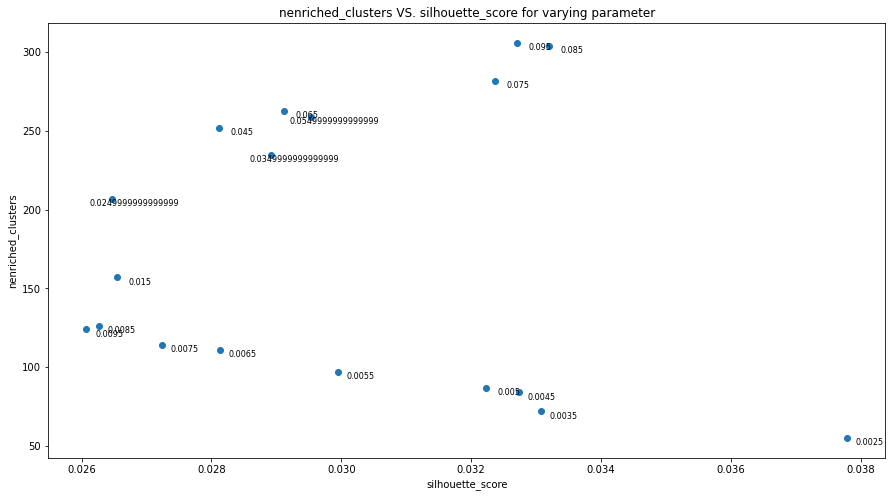

In [82]:
plt.figure(figsize=(15, 8))

# Create scatter plot
plt.scatter(df[x].values, df[y].values)

label_adj = (df[x].max() - df[x].min()) * 0.03

# Label each point with the number of nearest neighbors below the point
for i, txt in enumerate(df[labels].values):
    plt.text(df[x].values[i] + label_adj, df[y].values[i], str(txt),
            fontsize=8, ha='center', va='top', color='black')

# Set axis labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{y} VS. {x} for varying {labels}')

# Display the plot
plt.show()

In [83]:
df_stats_true['parameter'].unique()

array([1.00e-03, 5.00e-04, 1.50e-03, 2.50e-03, 3.50e-03, 4.50e-03,
       5.50e-03, 6.50e-03, 7.50e-03, 8.50e-03, 9.50e-03, 7.00e-03,
       1.05e-02, 1.40e-02, 1.75e-02, 2.10e-02, 2.45e-02, 2.80e-02,
       3.15e-02, 3.50e-02, 3.85e-02, 4.20e-02, 4.55e-02, 4.90e-02,
       5.25e-02, 5.60e-02, 5.95e-02, 6.30e-02, 6.65e-02, 7.00e-02,
       7.35e-02, 7.70e-02, 8.05e-02, 8.40e-02, 8.75e-02, 9.10e-02,
       9.45e-02, 9.80e-02, 4.00e-01, 6.00e-01, 8.00e-01, 2.00e-04,
       4.00e-04, 6.00e-04, 8.00e-04, 1.20e-03, 5.00e-03, 1.50e-02,
       2.50e-02, 3.50e-02, 4.50e-02, 5.50e-02, 6.50e-02, 7.50e-02,
       8.50e-02, 9.50e-02])

0.001


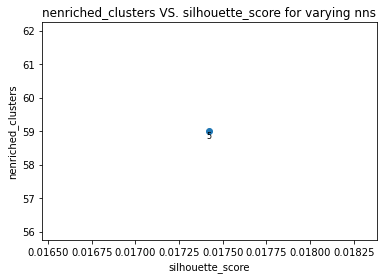

0.0005


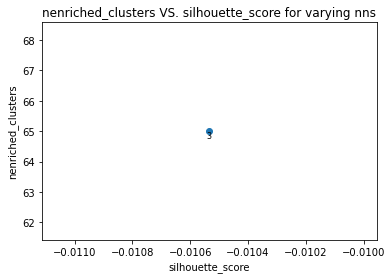

0.0015


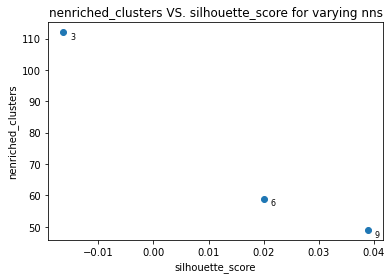

0.0025


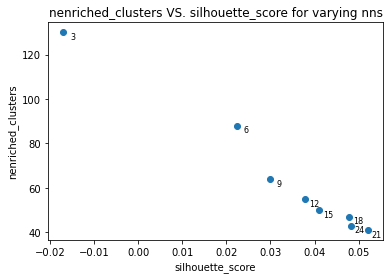

0.0035


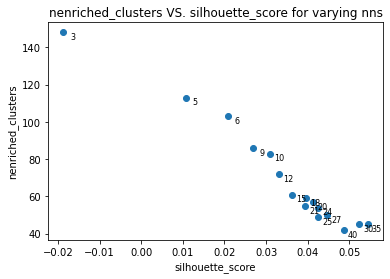

0.0045


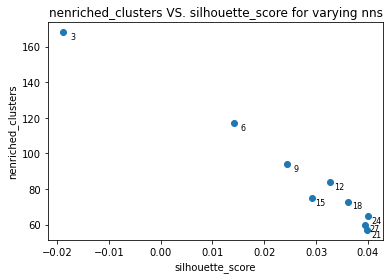

0.0055


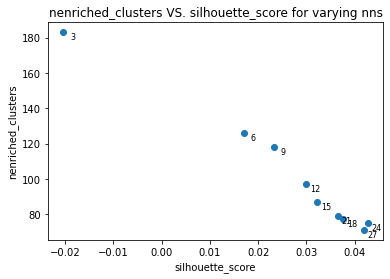

0.0065


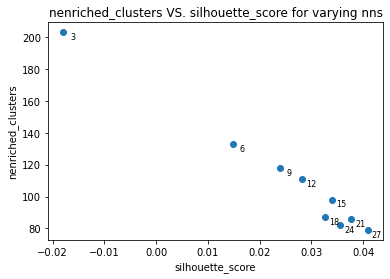

0.0075


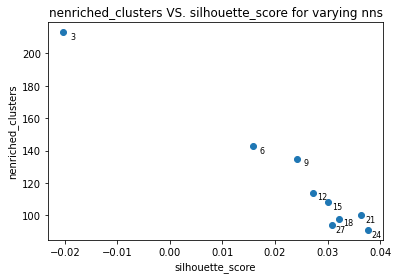

0.0085


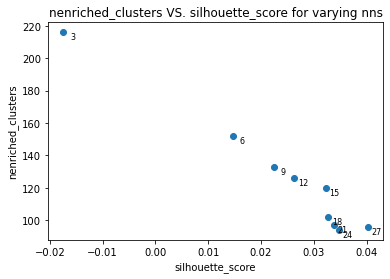

0.0095


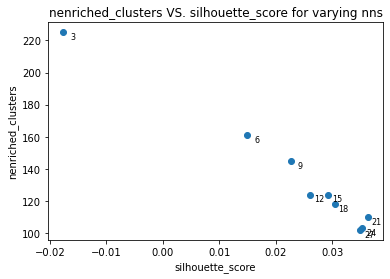

0.007


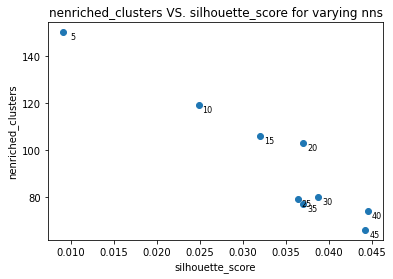

0.0105


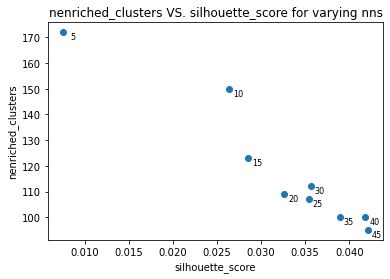

0.014


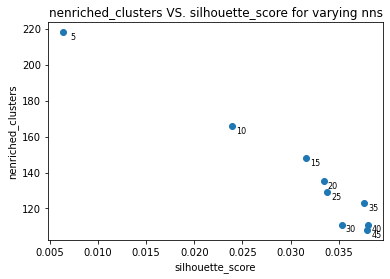

0.0175


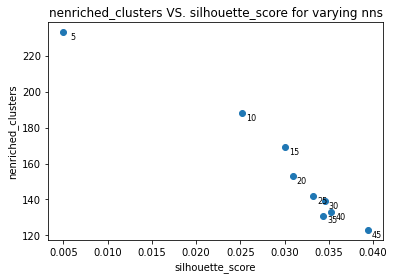

0.021


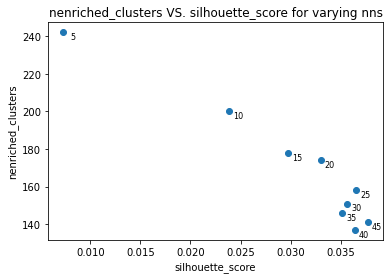

0.0245


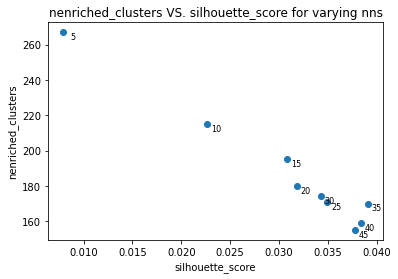

0.028


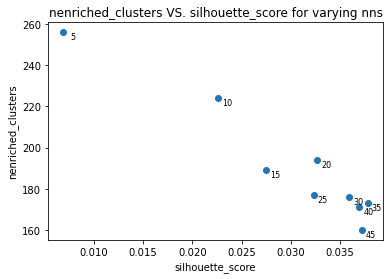

0.0315


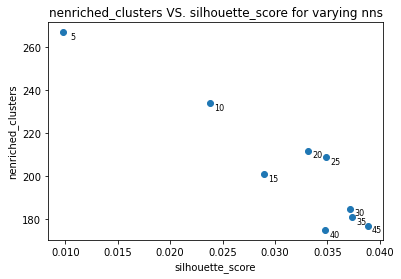

0.035


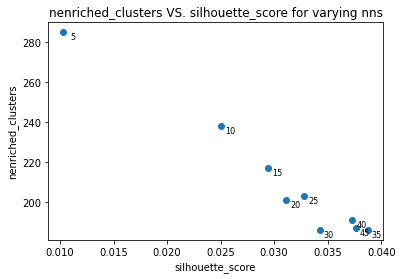

0.0385


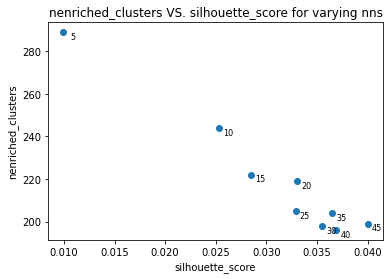

0.042


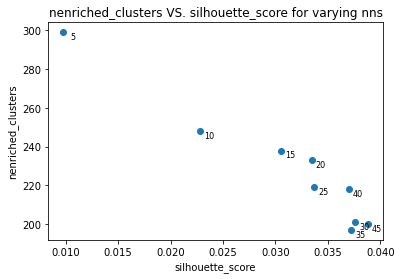

0.0455


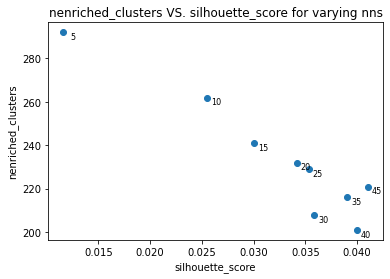

0.049


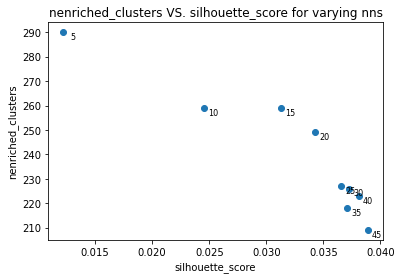

0.0525


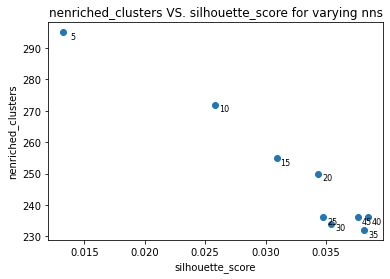

0.056


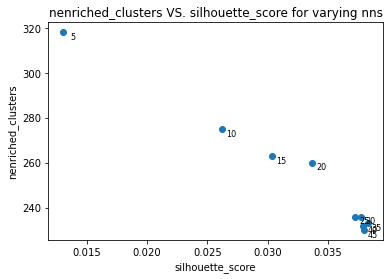

0.0595


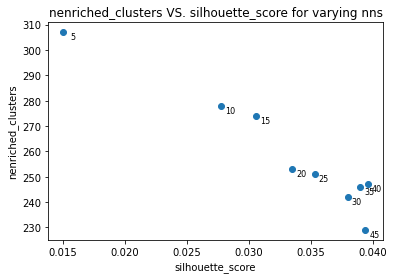

0.063


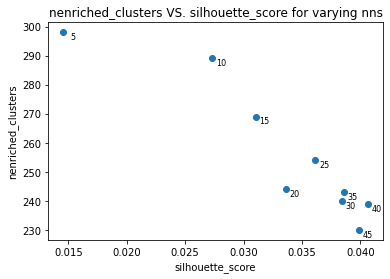

0.0665


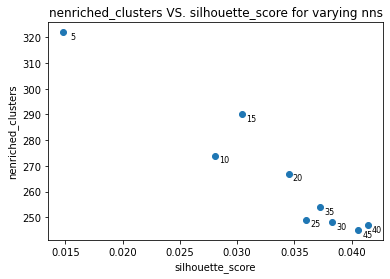

0.07


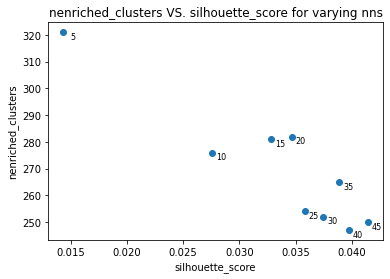

0.0735


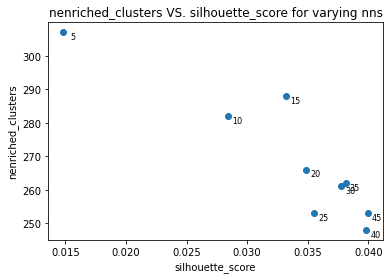

0.077


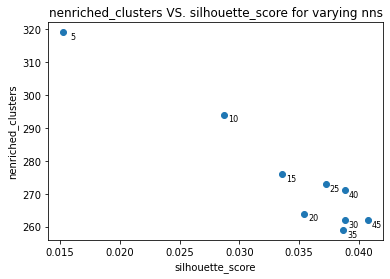

0.0805


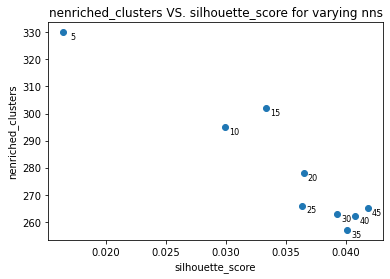

0.084


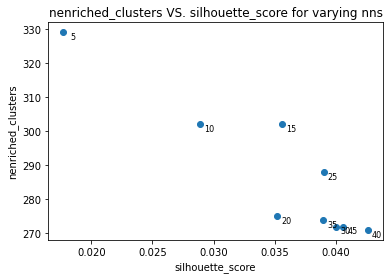

0.0875


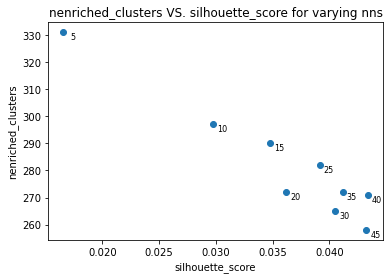

0.091


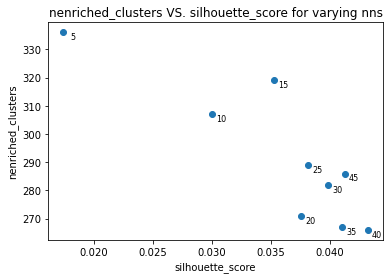

0.0945


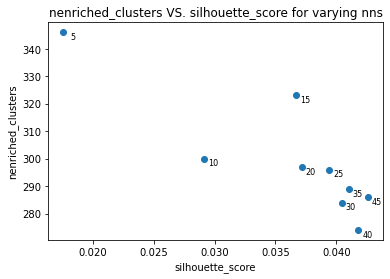

0.098


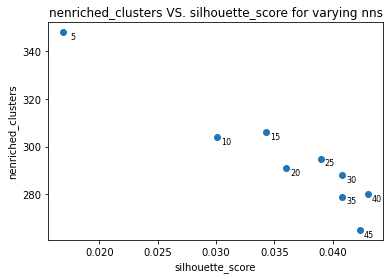

0.4


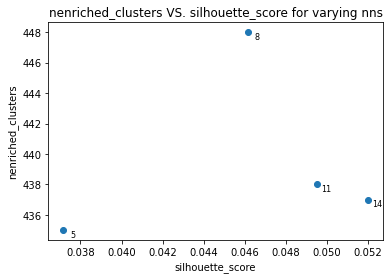

0.6000000000000001


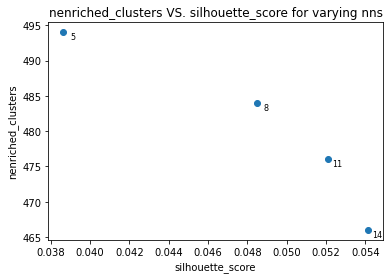

0.8000000000000002


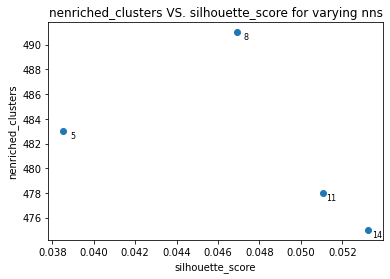

0.0002


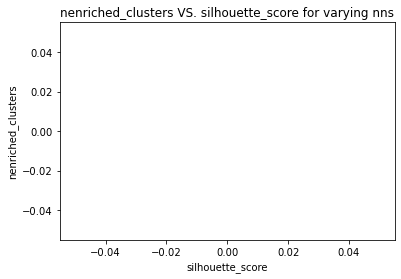

0.0004


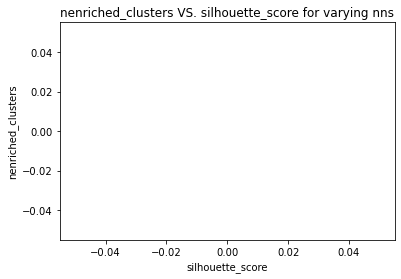

0.0006


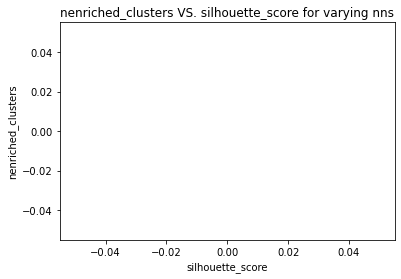

0.0008


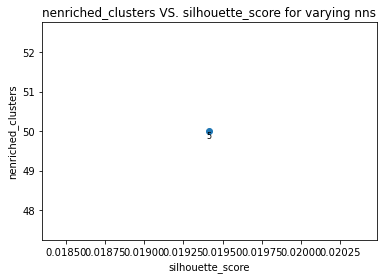

0.0012


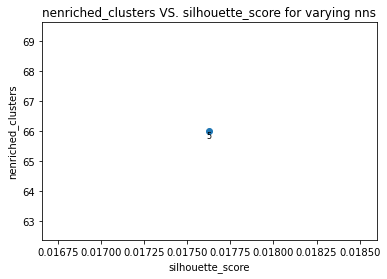

0.005


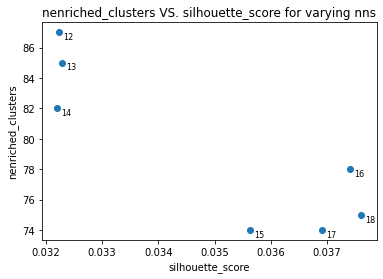

0.015


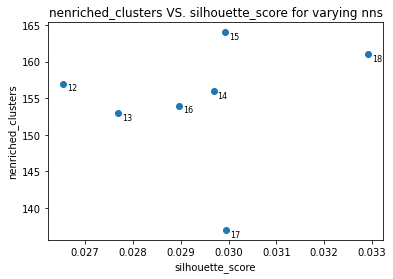

0.0249999999999999


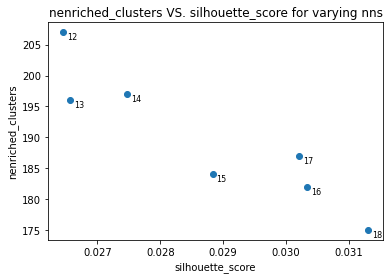

0.0349999999999999


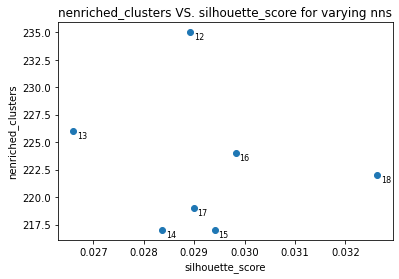

0.045


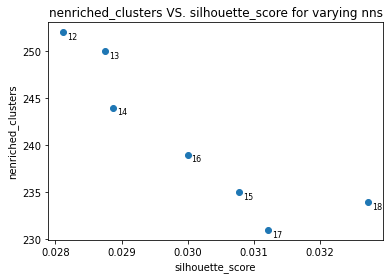

0.0549999999999999


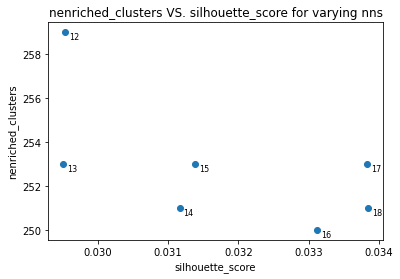

0.065


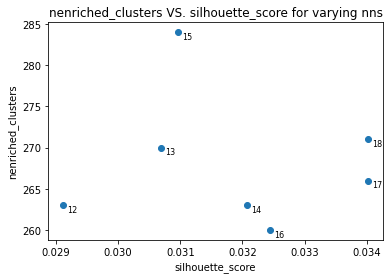

0.075


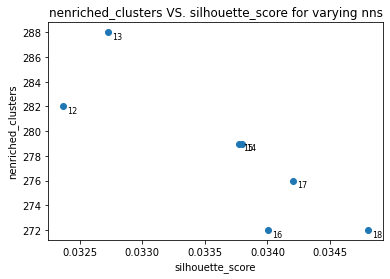

0.085


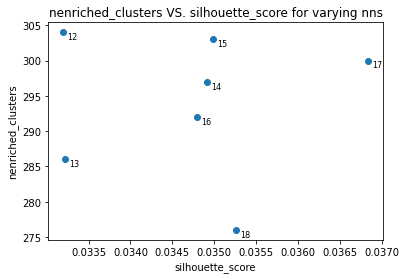

0.095


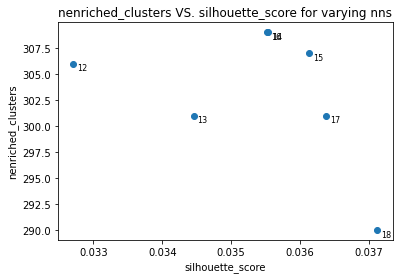

In [84]:
for p in df_stats_true['parameter'].unique():
    df = df_stats_true.loc[
        # (df_stats_true['nns'] == 6) & 
        (df_stats_true['parameter'] == p) & 

        (df_stats_true['dimensionality'] == 'baseline') &
        (df_stats_true['graph'] == 'umap_fuzzy_simplicial_set') &
        (df_stats_true['clustering'] == 'leiden_cpm') &
        (df_stats_true['metric'] == 'manhattan') &
        (df_stats_true['nclusters'] > 50)
    ]

    y = 'nenriched_clusters'
    # y = 'num_clusters_fraction_of_genes_enriched'

    x = 'silhouette_score'
    # x = 'modularity'

    # labels = 'parameter'
    labels = 'nns'

    # Create scatter plot
    plt.scatter(df[x].values, df[y].values)

    label_adj = (df[x].max() - df[x].min()) * 0.03

    # Label each point with the number of nearest neighbors below the point
    for i, txt in enumerate(df[labels].values):
        plt.text(df[x].values[i] + label_adj, df[y].values[i], str(txt),
                fontsize=8, ha='center', va='top', color='black')

    # Set axis labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} VS. {x} for varying {labels}')

    # Display the plot
    print(p)
    plt.show()